In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import pickle
from io import BytesIO
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
import pickle,re,zipfile
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
#z=zipfile.ZipFile(r'C:\Users\Dell\Downloads\archive (1).zip')
#z.extractall()
data=pd.read_csv("D:\\coding\\music_recommand\\amazon_alexa.tsv",sep="\\t")
data.head(30)

C:\Users\dell\AppData\Local\Temp\ipykernel_22388\3566824253.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv("D:\\coding\\music_recommand\\amazon_alexa.tsv",sep="\\t")


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1


In [36]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [37]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [38]:
data.dropna(inplace=True)

In [39]:
data.shape

(3149, 5)

In [40]:
data.feedback.value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [41]:
data['length']=data['verified_reviews'].apply(len)


In [42]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [43]:
print(f"'verfied reviews' column value:{data.iloc[10]['verified_reviews']}")
print(f"'Length of review:{len(data.iloc[10]['verified_reviews'])}")
print(f"'Length column value :{data.iloc[10]['length']}")

'verfied reviews' column value:"I sent it to my 85 year old Dad, and he talks to it constantly."
'Length of review:65
'Length column value :65


In [44]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [45]:
len(data)

3149

In [46]:
print(f"Rating value count:\n{data['rating'].value_counts()}")

Rating value count:
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


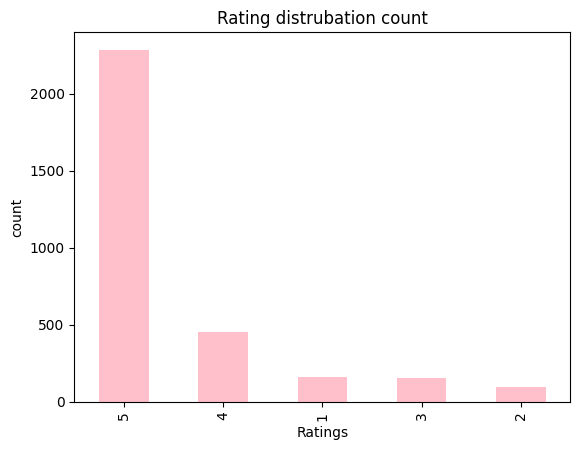

In [47]:
data['rating'].value_counts().plot.bar(color='pink')
plt.title('Rating distrubation count')
plt.xlabel("Ratings")
plt.ylabel('count')
plt.show()

In [48]:
print(f"Rating value count - precentage distrubation:\n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - precentage distrubation:
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


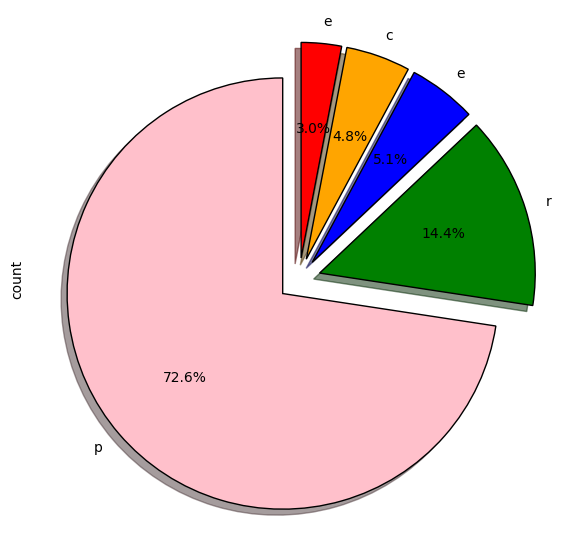

In [49]:
fig=plt.figure(figsize=(7,7))
colors=('pink','green','blue','orange','red')
wp={'linewidth':1,"edgecolor":"black"}
tags = data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True, colors=colors,startangle=90,wedgeprops=wp,explode=explode,labels='precerntage')
graph=BytesIO()
fig.savefig(graph,format="png")

In [50]:
print(f"feedback value count \n{data['feedback'].value_counts()}")

feedback value count 
feedback
1    2893
0     256
Name: count, dtype: int64


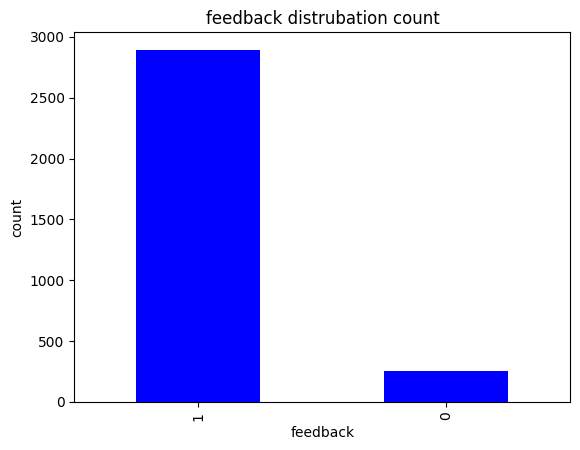

In [51]:
data['feedback'].value_counts().plot.bar(color='blue')
plt.title('feedback distrubation count')
plt.xlabel("feedback")
plt.ylabel('count')
plt.show()

In [52]:
print(f"Feedback value count - percentage distribuation \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribuation 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='count'>

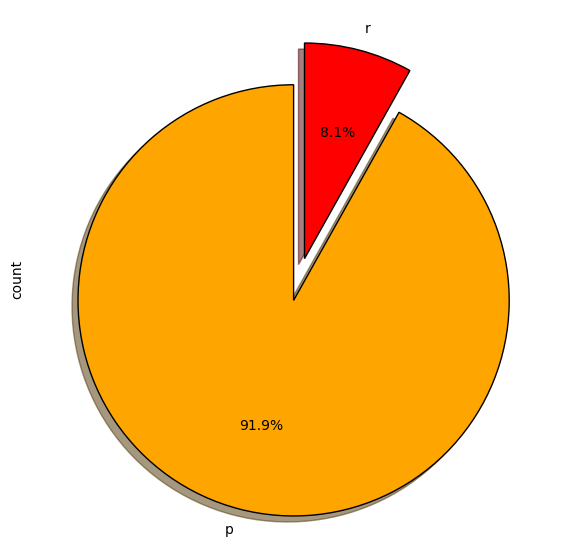

In [53]:
fig=plt.figure(figsize=(7,7))
colors=('orange','red')
wp={'linewidth':1,"edgecolor":"black"}
tags = data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True, colors=colors,startangle=90,wedgeprops=wp,explode=explode,labels='precerntagewise distrubution of feedback')


In [54]:
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [55]:
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [56]:
print(f"Variation value count: \n{data['variation'].value_counts()}")


Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


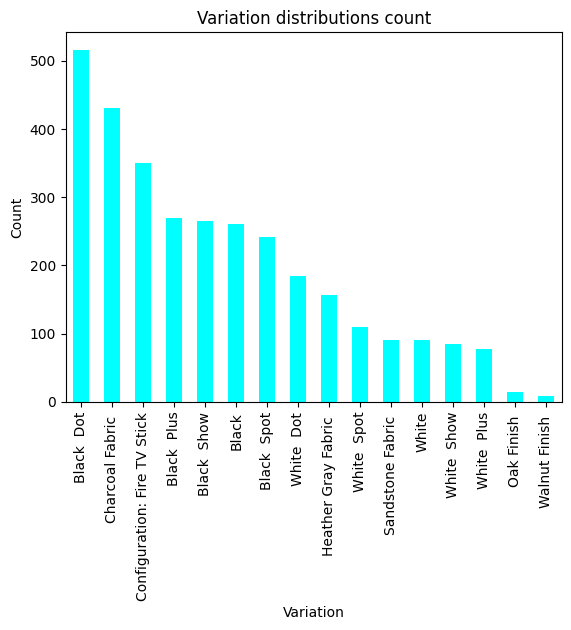

In [57]:

data['variation'].value_counts().plot.bar(color = 'cyan')
plt.title('Variation distributions count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [58]:
print(f"Variation value count - percentage distributions: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")


Variation value count - percentage distributions: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


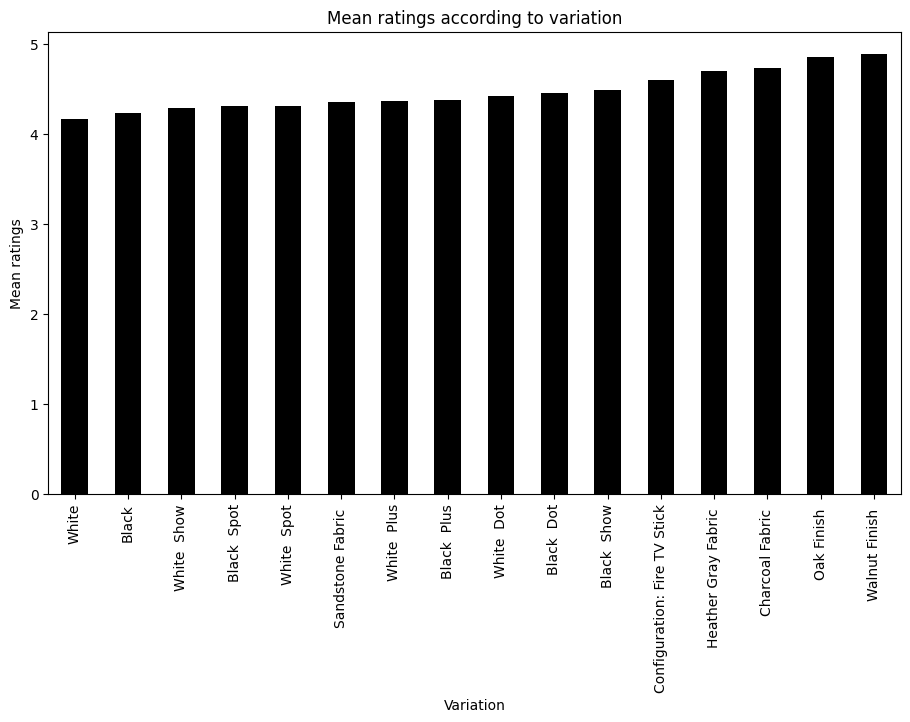

In [59]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'black', figsize=(11, 6))
plt.title("Mean ratings according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean ratings')
plt.show()

In [60]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'distribuation of length of review if feedback= 0')]

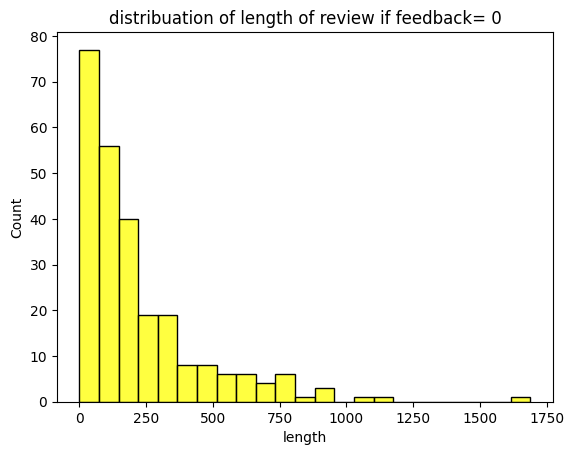

In [61]:
sns.histplot(data[data['feedback']==0]['length'],color='yellow').set(title='distribuation of length of review if feedback= 0')

[Text(0.5, 1.0, 'distribuation of length of review if feedback= 1')]

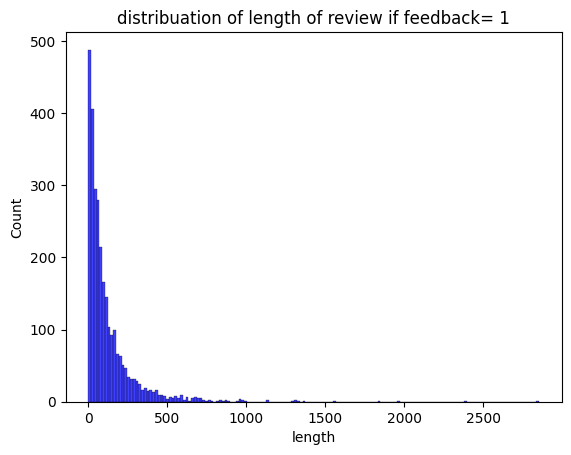

In [62]:
sns.histplot(data[data['feedback']==1]['length'],color='blue').set(title='distribuation of length of review if feedback= 1')

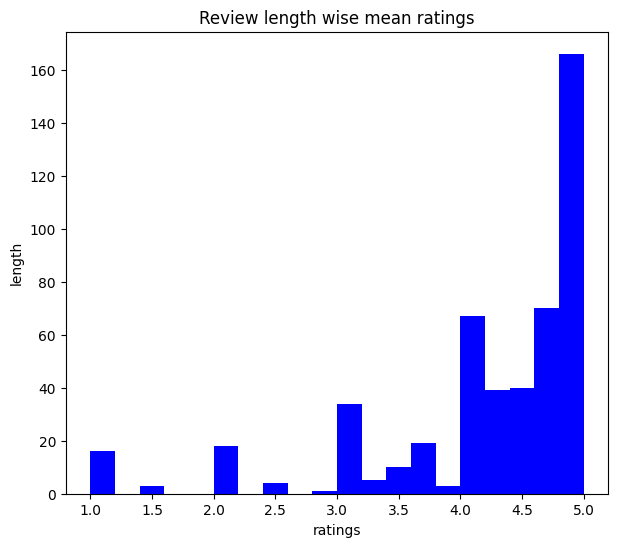

In [63]:
data.groupby('length')['rating'].mean().plot.hist(color='blue',figsize=(7,6),bins=20)
plt.title("Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [64]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

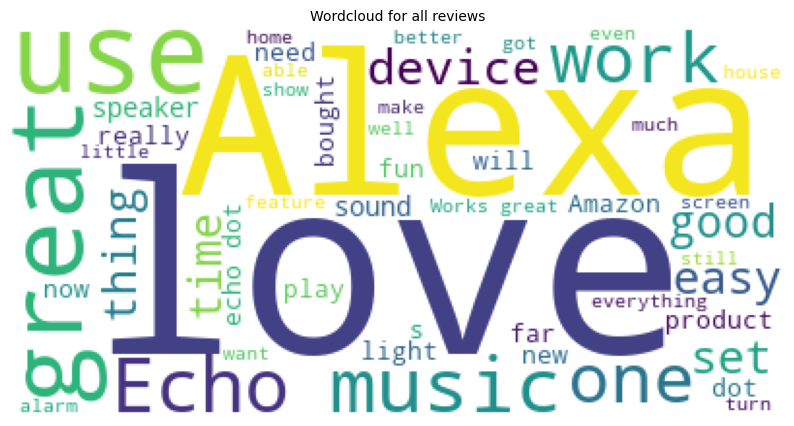

In [65]:
reviews = " ".join([review for review in data['verified_reviews']])
                        
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [66]:
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

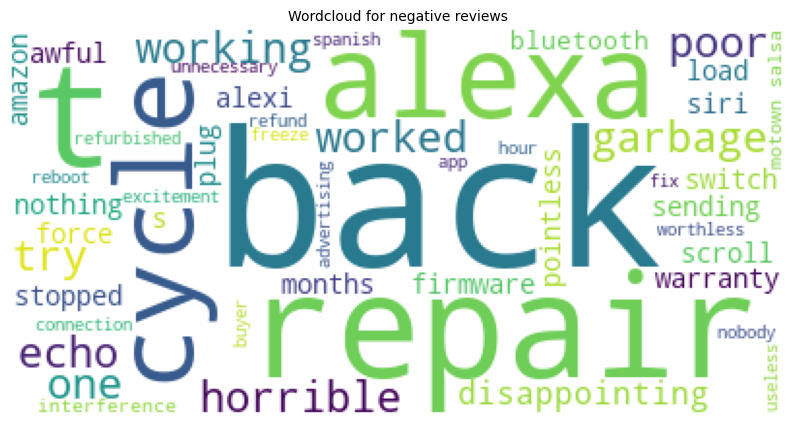

In [67]:
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

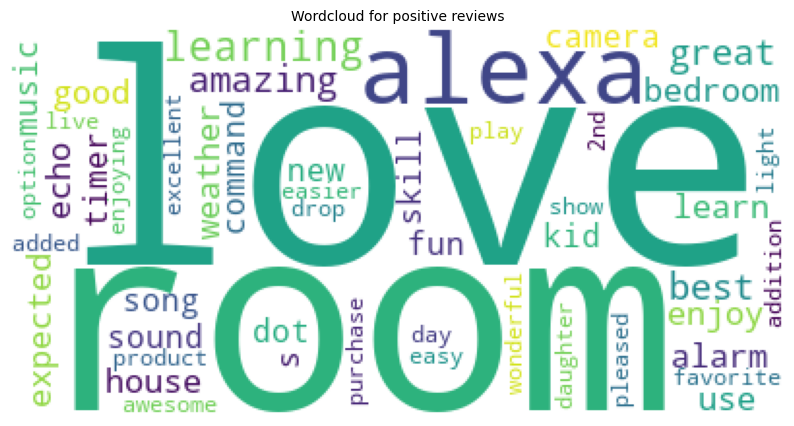

In [68]:
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [69]:
corpus=[]
stemmer = PorterStemmer()
for i in range(0,data.shape[0]):
    review=re.sub('[a-zA-Z]','',data.iloc[i]['verified_reviews'])
    review=review.lower().split()
    review=[stemmer.stem(word)for word in review if not word in STOPWORDS]
    review=''.join(review)
    corpus.append(review)

In [70]:
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [71]:
pickle.dump(cv,open(r'D:\coding\music_recommand\NLP_SENTIMENTAL\Models\countVectorizer.pkl','wb'))

In [72]:
print(f"X shape:{X.shape}")
print(f"y shape:{y.shape}")

X shape:(3149, 72)
y shape:(3149,)


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)
print(f"X_trin:{X_train.shape}")
print(f"y_train:{y_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_test:{y_test.shape}")


X_trin:(2204, 72)
y_train:(2204,)
X_test:(945, 72)
y_test:(945,)


In [74]:
print(f"X_train max_value:{X_train.max()}")
print(f"X_test max value:{X_test.max()}")

X_train max_value:12
X_test max value:18


In [75]:
scaler=MinMaxScaler()
X_train_scl=scaler.fit_transform(X_train)
X_test_scl=scaler.transform(X_test)

In [79]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [80]:
df=RandomForestClassifier()
df.fit(X_train_scl,y_train)

RandomForestClassifier()

In [81]:
print("Training Accuracy:",df.score(X_train_scl,y_train))
print("Testing Accuaracy:",df.score(X_test_scl,y_test))


Training Accuracy: 0.927858439201452
Testing Accuaracy: 0.9142857142857143


In [82]:
y_preds=df.predict(X_test_scl)

In [83]:
cm=confusion_matrix(y_test,y_preds)

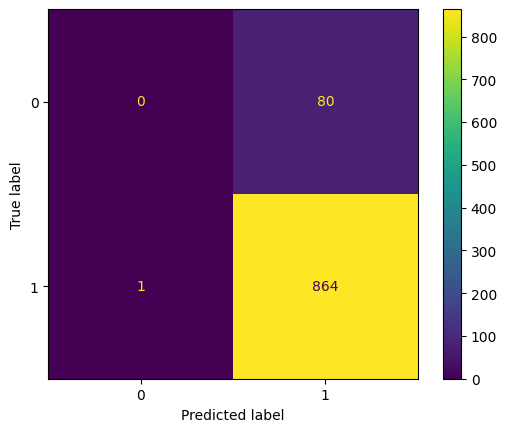

In [84]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df.classes_)
cm_display.plot()
plt.show()

In [85]:
accuraies=cross_val_score(estimator=df,X=X_train_scl,y=y_train,cv=10)
print("accuracy:",accuraies.mean())
print("Standard Variance:",accuraies.std())

accuracy: 0.9187844508432743
Standard Variance: 0.0042762950962003145


In [86]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [87]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = df, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [88]:
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [89]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 92.63271324863884
Cross validation mean accuracy on test set : 91.82735934664248
Accuracy score for test set : 0.9142857142857143


In [90]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [91]:
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9201451905626135
Testing Accuracy : 0.9153439153439153


In [92]:
y_preds = model_xgb.predict(X_test)

In [93]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[  0  80]
 [  0 865]]


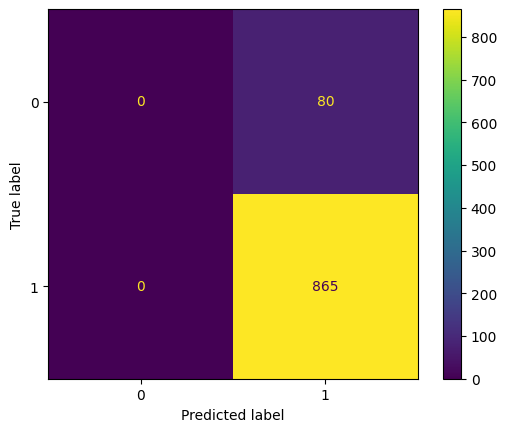

In [94]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()